## CO2 data by Country
Unless otherwise noted temperatures in fahrenheit and CO2 thousands metric tons will be displayed in separate charts because of scale differences.

## CO2 Unit of Measure
CO2 numbers are listed in the source file as Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C).

## CO2 Data Source:
* Tom Boden and Bob Andres (Oak Ridge National Laboratory)
* Gregg Marland (Appalachian State University)
* DOI: 10.3334/CDIAC/00001_V2017

## Countries with CO2 and Temperature data 1850 - 2012
SWEDEN,
CANADA,
FRANCE,
UNITED KINGDOM,
SPAIN,
POLAND

## Countries with CO2 and Temperature data 1878 - 2012
UNITED STATES, AUSTRALIA, INDIA.

## G20 Countries

The G20 consists of Argentina, Australia, Brazil, Canada, China, France, Germany, India, Indonesia, Italy, Japan, Mexico, Russia, Saudi Arabia, South Africa, South Korea, Turkey, United Kingdom, United States, and the European Union.

In [74]:
import pandas as pd
import numpy as np
import scipy as sp
import datetime as dt
from datetime import datetime, date, time
import matplotlib.dates as mdates
import seaborn as sns
# Set my default color palette
mycolors = ["royalblue", "blue", "red", "green", "cyan", "orange", 
            "purple", "olive", "limegreen", "magenta", ]
sns.set_palette(mycolors)

In [75]:
# Store filepath in a variable: 
# parse_dates=["year"] or dtype=object
myCO2="./source/myCO2.csv"
co2_df = pd.read_csv(myCO2)
co2_df.info()
co2_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17232 entries, 0 to 17231
Data columns (total 3 columns):
year       17232 non-null int64
country    17232 non-null object
co2        17232 non-null int64
dtypes: int64(2), object(1)
memory usage: 404.0+ KB


,year,country,co2
0,1751,UNITED KINGDOM,2552
1,1752,UNITED KINGDOM,2553
2,1753,UNITED KINGDOM,2553
3,1754,UNITED KINGDOM,2554
4,1755,UNITED KINGDOM,2555


In [76]:
# Store filepath in a variable: 
# parse_dates=["year"] or dtype=object
myTmps="./source/myYearTempsF.csv"
tmps_df = pd.read_csv(myTmps)
tmps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45358 entries, 0 to 45357
Data columns (total 5 columns):
year                       45358 non-null int64
country                    45358 non-null object
avg_yly_tmp_f              45358 non-null float64
avg_yly_tmp_c              45358 non-null float64
avg_yly_tmp_uncertainty    45358 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.7+ MB


In [77]:
tmps_df["country"]= tmps_df["country"].apply(lambda x: x.upper())
tmps_df.info()
tmps_df.head(5)    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45358 entries, 0 to 45357
Data columns (total 5 columns):
year                       45358 non-null int64
country                    45358 non-null object
avg_yly_tmp_f              45358 non-null float64
avg_yly_tmp_c              45358 non-null float64
avg_yly_tmp_uncertainty    45358 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.7+ MB


,year,country,avg_yly_tmp_f,avg_yly_tmp_c,avg_yly_tmp_uncertainty
0,1744,ALBANIA,57.311375,14.061875,2.243000
1,1744,ANDORRA,53.892950,12.162750,2.176625
2,1744,AUSTRIA,46.012550,7.784750,2.080250
3,1744,BELARUS,46.579325,8.099625,2.417750
4,1744,BELGIUM,51.225800,10.681000,1.846375


In [78]:
# Merge the two dataframes on the "year" and "country" fields

co2_tmp_df = pd.merge(co2_df, tmps_df, on=(["year","country"]),\
                      how="inner", suffixes=("_x", "_y"))
print(len(co2_tmp_df.index))                     
co2_tmp_df.head(5)

13343


,year,country,co2,avg_yly_tmp_f,avg_yly_tmp_c,avg_yly_tmp_uncertainty
0,1751,UNITED KINGDOM,2552,47.897375,8.831875,1.592250
1,1752,UNITED KINGDOM,2553,43.259300,6.255167,1.773833
2,1753,UNITED KINGDOM,2553,47.166950,8.426083,3.807083
3,1754,UNITED KINGDOM,2554,47.009900,8.338833,3.258917
4,1755,UNITED KINGDOM,2555,46.498700,8.054833,4.423917


In [79]:
# Export file as an XLSX or CSV, w/o index, w/ header
co2_tmp_df.to_csv("../output/co2_tmp_1.csv", index=False, header=True)

In [80]:
check_counts = co2_tmp_df.groupby(["country"],\
                as_index=False)["avg_yly_tmp_f"].\
                count().rename(columns={"avg_yly_tmp_f":"count"})
check_counts.head(5)

,country,count
0,AFGHANISTAN,64
1,ALBANIA,80
2,ALGERIA,103
3,ANDORRA,23
4,ANGOLA,63


In [81]:
# Export file as an XLSX or CSV, w/o index, w/ header
check_counts.to_excel("../output/check_counts.xlsx",\
                    index=False, header=True)

In [82]:
# Create a dataframe of just numbers
co2_tmp = co2_tmp_df[["co2","avg_yly_tmp_f","avg_yly_tmp_c",\
                      "avg_yly_tmp_uncertainty"]]
co2_tmp.head(5)

,co2,avg_yly_tmp_f,avg_yly_tmp_c,avg_yly_tmp_uncertainty
0,2552,47.897375,8.831875,1.592250
1,2553,43.259300,6.255167,1.773833
2,2553,47.166950,8.426083,3.807083
3,2554,47.009900,8.338833,3.258917
4,2555,46.498700,8.054833,4.423917


In [83]:
co2_tmp.corr()

,co2,avg_yly_tmp_f,avg_yly_tmp_c,avg_yly_tmp_uncertainty
co2,1.000000,-0.121071,-0.121071,-0.095719
avg_yly_tmp_f,-0.121071,1.000000,1.000000,-0.362135
avg_yly_tmp_c,-0.121071,1.000000,1.000000,-0.362135
avg_yly_tmp_uncertainty,-0.095719,-0.362135,-0.362135,1.000000


In [84]:
co2tmp1 = co2_tmp_df.loc[(co2_tmp_df["country"] == 'SWEDEN') &      
                         (co2_tmp_df["year"]>= 1850)].\
                         reset_index(drop=True)
print(len(co2tmp1.index))
co2tmp1.head(5)

163


,year,country,co2,avg_yly_tmp_f,avg_yly_tmp_c,avg_yly_tmp_uncertainty
0,1850,SWEDEN,55,35.18765,1.770917,1.440000
1,1851,SWEDEN,59,36.54005,2.522250,1.443667
2,1852,SWEDEN,59,36.17555,2.319750,1.434333
3,1853,SWEDEN,62,35.94350,2.190833,1.054667
4,1854,SWEDEN,92,36.91715,2.731750,1.394500


In [85]:
# Get the min and max date range
co2tmp1_min_date = co2tmp1["year"].min()
co2tmp1_max_date = co2tmp1["year"].max()
print("min year " + str(co2tmp1_min_date) + " max year " + \
      str(co2tmp1_max_date))

min year 1850 max year 2012


In [86]:
co2tmp1.corr()

,year,co2,avg_yly_tmp_f,avg_yly_tmp_c,avg_yly_tmp_uncertainty
year,1.000000,0.860757,0.435743,0.435743,-0.817374
co2,0.860757,1.000000,0.281104,0.281104,-0.621467
avg_yly_tmp_f,0.435743,0.281104,1.000000,1.000000,-0.323334
avg_yly_tmp_c,0.435743,0.281104,1.000000,1.000000,-0.323334
avg_yly_tmp_uncertainty,-0.817374,-0.621467,-0.323334,-0.323334,1.000000


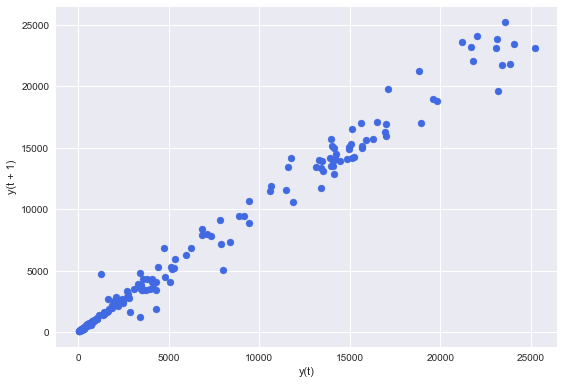

In [87]:
from pandas.plotting import lag_plot
from matplotlib.figure import Figure
import matplotlib.pyplot as plt

plt.figure()
data = co2tmp1["co2"]
lag_plot(data)

plt.tight_layout()
plt.savefig("sweden_lag-plot_co2.png")
plt.show()

## Numpy Histogram()
# https://www.tutorialspoint.com/numpy/numpy_histogram_using_matplotlib.htm
NumPy has a numpy.histogram() function that is a graphical representation of the frequency distribution of data. Rectangles of equal horizontal size corresponding to class interval called bin and variable height corresponding to frequency.

In [88]:
import numpy as np 
   
a = np.array(co2tmp1["co2"]) 
np.histogram(a,bins = 'auto') 
hist,bins = np.histogram(a,bins = 'auto') 
print(hist) 
print(bins) 

[63 28 10  6 15 21  7  5  8]
[    55.   2848.   5641.   8434.  11227.  14020.  16813.  19606.  22399.
  25192.]


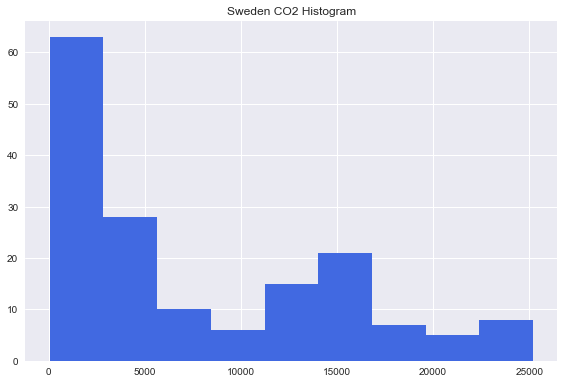

In [145]:
from matplotlib import pyplot as plt 
import numpy as np  
   
a = np.array(co2tmp1["co2"]) 
plt.hist(a, bins='auto') 
plt.title("Sweden CO2 Histogram")
plt.tight_layout()
plt.savefig("sweden_histogram_co2.png") 
plt.show()

In [90]:
co2tmp2 = co2_tmp_df.loc[(co2_tmp_df["country"] == 'CANADA') &       
                         (co2_tmp_df["year"]>= 1850)].\
                         reset_index(drop=True)
print(len(co2tmp2.index))
co2tmp2.head(5)

163


,year,country,co2,avg_yly_tmp_f,avg_yly_tmp_c,avg_yly_tmp_uncertainty
0,1850,CANADA,16,22.03475,-5.536250,2.261167
1,1851,CANADA,19,22.39175,-5.337917,2.188250
2,1852,CANADA,23,22.35560,-5.358000,2.292583
3,1853,CANADA,28,21.93635,-5.590917,2.355750
4,1854,CANADA,34,22.01765,-5.545750,2.362167


In [91]:
# Get the min and max date range
co2tmp2_min_date = co2tmp2["year"].min()
co2tmp2_max_date = co2tmp2["year"].max()
print("min year " + str(co2tmp2_min_date) + " max year " + \
      str(co2tmp2_max_date))

min year 1850 max year 2012


In [92]:
co2tmp2.corr()

,year,co2,avg_yly_tmp_f,avg_yly_tmp_c,avg_yly_tmp_uncertainty
year,1.000000,0.927695,0.637257,0.637257,-0.920606
co2,0.927695,1.000000,0.631111,0.631111,-0.723230
avg_yly_tmp_f,0.637257,0.631111,1.000000,1.000000,-0.514870
avg_yly_tmp_c,0.637257,0.631111,1.000000,1.000000,-0.514870
avg_yly_tmp_uncertainty,-0.920606,-0.723230,-0.514870,-0.514870,1.000000


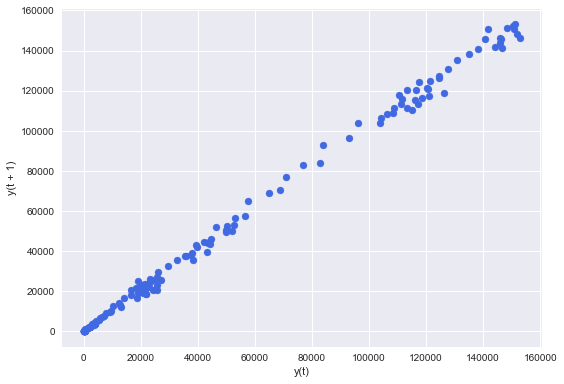

In [93]:
from pandas.plotting import lag_plot
from matplotlib.figure import Figure
import matplotlib.pyplot as plt

plt.figure()
data = co2tmp2["co2"]
lag_plot(data)

plt.tight_layout()
plt.savefig("canada_lag-plot_co2.png")
plt.show()

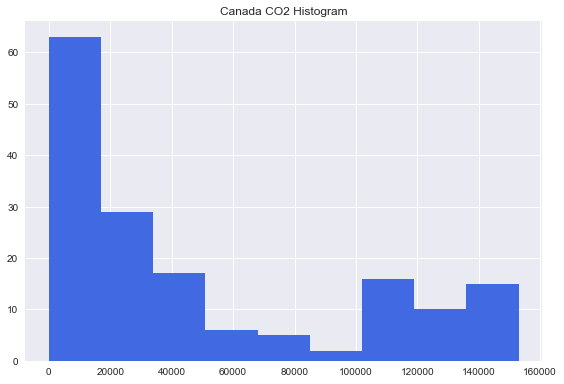

In [144]:
from matplotlib import pyplot as plt 
import numpy as np  
   
a = np.array(co2tmp2["co2"]) 
plt.hist(a, bins='auto') 
plt.title("Canada CO2 Histogram")
plt.tight_layout()
plt.savefig("canada_histogram_co2.png") 
plt.show()

In [95]:
co2tmp3 = co2_tmp_df.loc[(co2_tmp_df["country"] == 'FRANCE') &        
                         (co2_tmp_df["year"]>= 1850)].\
                         reset_index(drop=True)
print(len(co2tmp3.index))
co2tmp3.head(5)

163


,year,country,co2,avg_yly_tmp_f,avg_yly_tmp_c,avg_yly_tmp_uncertainty
0,1850,FRANCE,5354,53.99150,12.217500,1.438917
1,1851,FRANCE,5469,53.67680,12.042667,1.535417
2,1852,FRANCE,5887,55.46405,13.035583,1.440083
3,1853,FRANCE,6916,53.28710,11.826167,1.216583
4,1854,FRANCE,7973,54.39770,12.443167,1.427750


In [96]:
# Get the min and max date range
co2tmp3_min_date = co2tmp3["year"].min()
co2tmp3_max_date = co2tmp3["year"].max()
print("min year " + str(co2tmp3_min_date) + " max year " + \
      str(co2tmp3_max_date))

min year 1850 max year 2012


In [97]:
co2tmp3.corr()

,year,co2,avg_yly_tmp_f,avg_yly_tmp_c,avg_yly_tmp_uncertainty
year,1.000000,0.910198,0.658977,0.658977,-0.918300
co2,0.910198,1.000000,0.532010,0.532010,-0.820009
avg_yly_tmp_f,0.658977,0.532010,1.000000,1.000000,-0.510923
avg_yly_tmp_c,0.658977,0.532010,1.000000,1.000000,-0.510923
avg_yly_tmp_uncertainty,-0.918300,-0.820009,-0.510923,-0.510923,1.000000


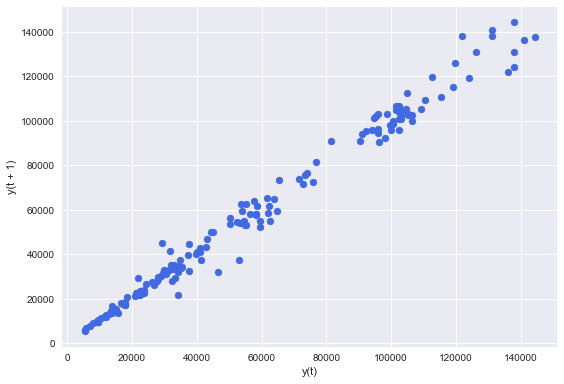

In [98]:
from pandas.plotting import lag_plot
from matplotlib.figure import Figure
import matplotlib.pyplot as plt

plt.figure()
data = co2tmp3["co2"]
lag_plot(data)

plt.tight_layout()
plt.savefig("france_lag-plot_co2.png")
plt.show()

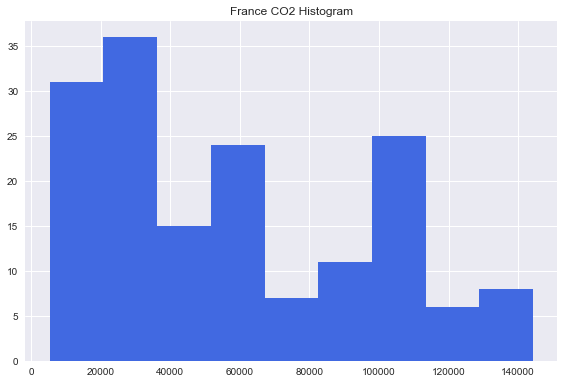

In [143]:
from matplotlib import pyplot as plt 
import numpy as np  
   
a = np.array(co2tmp3["co2"]) 
plt.hist(a, bins='auto') 
plt.title("France CO2 Histogram")
plt.tight_layout()
plt.savefig("france_histogram_co2.png")
plt.show()

In [100]:
co2tmp4A = co2_tmp_df.loc[(co2_tmp_df["country"] == 'UNITED STATES') & 
                         (co2_tmp_df["year"]>= 1878)].\
                         reset_index(drop=True)
print(len(co2tmp4A.index))
co2tmp4A.head(5)

135


,year,country,co2,avg_yly_tmp_f,avg_yly_tmp_c,avg_yly_tmp_uncertainty
0,1878,UNITED STATES,39275,48.23090,9.017167,0.940167
1,1879,UNITED STATES,47890,47.62985,8.683250,0.958000
2,1880,UNITED STATES,54226,46.59860,8.110333,1.057083
3,1881,UNITED STATES,57367,47.55830,8.643500,0.875083
4,1882,UNITED STATES,64245,47.06585,8.369917,0.630417


In [101]:
# Get the min and max date range
co2tmp4A_min_date = co2tmp4A["year"].min()
co2tmp4A_max_date = co2tmp4A["year"].max()
print("min year " + str(co2tmp4A_min_date) + " max year " + \
      str(co2tmp4A_max_date))

min year 1878 max year 2012


In [102]:
co2tmp4A.corr()

,year,co2,avg_yly_tmp_f,avg_yly_tmp_c,avg_yly_tmp_uncertainty
year,1.000000,0.978932,0.671187,0.671187,-0.756309
co2,0.978932,1.000000,0.623459,0.623459,-0.674993
avg_yly_tmp_f,0.671187,0.623459,1.000000,1.000000,-0.489736
avg_yly_tmp_c,0.671187,0.623459,1.000000,1.000000,-0.489736
avg_yly_tmp_uncertainty,-0.756309,-0.674993,-0.489736,-0.489736,1.000000


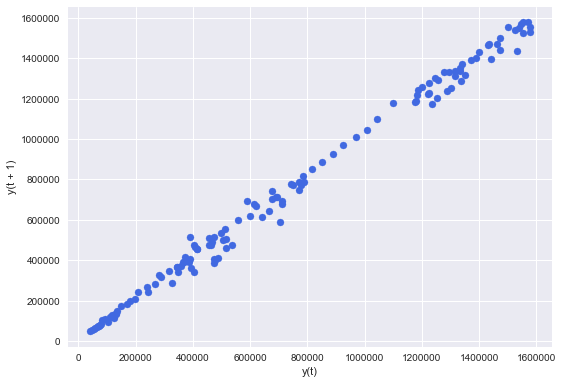

In [103]:
from pandas.plotting import lag_plot
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
data = co2tmp4A["co2"]
lag_plot(data)


plt.tight_layout()
plt.savefig("usa_lag-plot_co2.png")
plt.show()

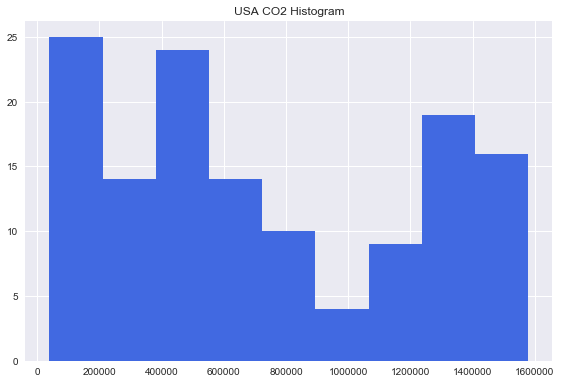

In [141]:
from matplotlib import pyplot as plt 
import numpy as np  
   
a = np.array(co2tmp4A["co2"]) 
plt.hist(a, bins='auto') 
plt.title("USA CO2 Histogram")
plt.tight_layout()
plt.savefig("usa_histogram_co2.png")
plt.show()

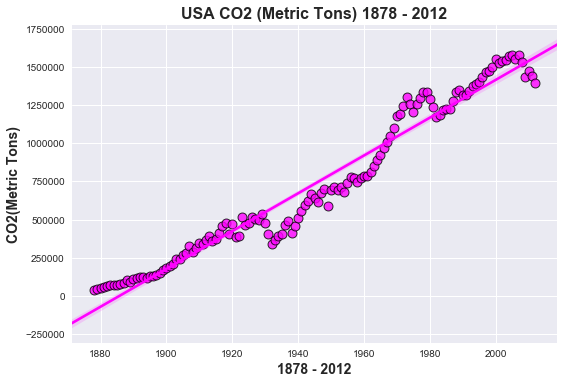

In [105]:
# https://seaborn.pydata.org/generated/seaborn.regplot.html
# import seaborn as sns; sns.set(color_codes=True)

import seaborn as sns

x_axis = co2tmp4A["year"]  
y_axis = co2tmp4A["co2"]

sns.regplot(x=x_axis, y=y_axis, color="magenta", marker="o", fit_reg=True, 
            scatter_kws={"s":80, "linewidths":1, "edgecolor":"k"})

sns.set_style("darkgrid")
sns.plt.title("USA CO2 (Metric Tons) 1878 - 2012", weight='bold').set_fontsize('16')
sns.plt.xlabel("1878 - 2012", weight='bold').set_fontsize('14')
sns.plt.ylabel("CO2(Metric Tons)", weight='bold',).set_fontsize('14')

plt.tight_layout()
plt.savefig("usa_co2_scatter.png",bbox_inches="tight")
plt.show()

In [106]:
co2tmp4B = co2_tmp_df.loc[(co2_tmp_df["country"] == 'AUSTRALIA') & 
                         (co2_tmp_df["year"]>= 1878)].\
                         reset_index(drop=True)
print(len(co2tmp4B.index))
co2tmp4B.head(5)

135


,year,country,co2,avg_yly_tmp_f,avg_yly_tmp_c,avg_yly_tmp_uncertainty
0,1878,AUSTRALIA,264,72.28520,22.380667,1.325667
1,1879,AUSTRALIA,397,70.13240,21.184667,0.956250
2,1880,AUSTRALIA,602,70.99025,21.661250,1.066833
3,1881,AUSTRALIA,482,71.22650,21.792500,0.882000
4,1882,AUSTRALIA,549,70.96535,21.647417,0.727583


In [107]:
# Get the min and max date range
co2tmp4B_min_date = co2tmp4B["year"].min()
co2tmp4B_max_date = co2tmp4B["year"].max()
print("min year " + str(co2tmp4B_min_date) + " max year " + \
      str(co2tmp4B_max_date))

min year 1878 max year 2012


In [108]:
co2tmp4B.corr()

,year,co2,avg_yly_tmp_f,avg_yly_tmp_c,avg_yly_tmp_uncertainty
year,1.000000,0.908754,0.570128,0.570128,-0.764406
co2,0.908754,1.000000,0.660048,0.660048,-0.510740
avg_yly_tmp_f,0.570128,0.660048,1.000000,1.000000,-0.209511
avg_yly_tmp_c,0.570128,0.660048,1.000000,1.000000,-0.209511
avg_yly_tmp_uncertainty,-0.764406,-0.510740,-0.209511,-0.209511,1.000000


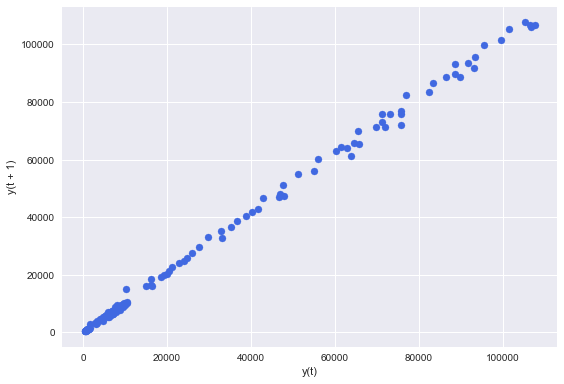

In [109]:
from pandas.plotting import lag_plot
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
data = co2tmp4B["co2"]
lag_plot(data)


plt.tight_layout()
plt.savefig("australia_lag-plot_co2.png")
plt.show()

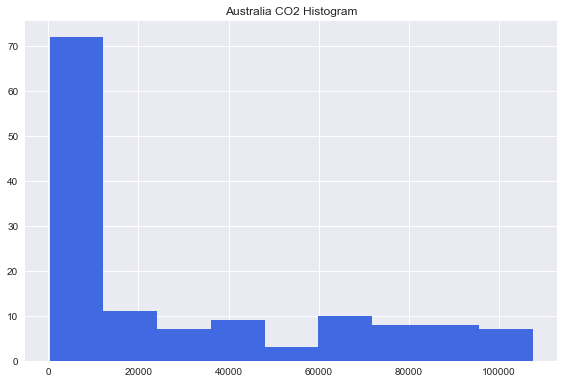

In [142]:
from matplotlib import pyplot as plt 
import numpy as np  
   
a = np.array(co2tmp4B["co2"]) 
plt.hist(a, bins='auto') 
plt.title("Australia CO2 Histogram")
plt.tight_layout()
plt.savefig("australia_histogram_co2.png")
plt.show()

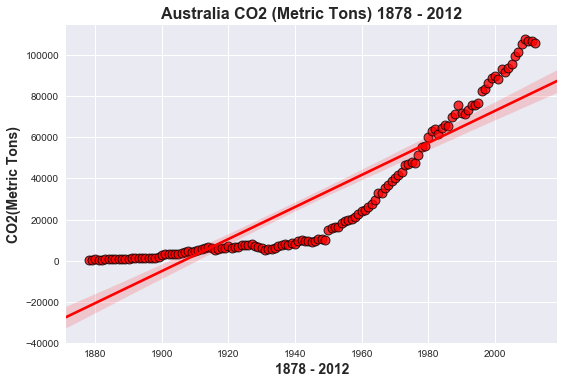

In [111]:
# https://seaborn.pydata.org/generated/seaborn.regplot.html
# import seaborn as sns; sns.set(color_codes=True)

import seaborn as sns

x_axis = co2tmp4B["year"]  
y_axis = co2tmp4B["co2"]



sns.regplot(x=x_axis, y=y_axis, color="red", marker="o", fit_reg=True, 
            scatter_kws={"s":80, "linewidths":1, "edgecolor":"k"})

sns.set_style("darkgrid")
sns.plt.title("Australia CO2 (Metric Tons) 1878 - 2012", weight='bold').set_fontsize('16')
sns.plt.xlabel("1878 - 2012", weight='bold').set_fontsize('14')
sns.plt.ylabel("CO2(Metric Tons)", weight='bold',).set_fontsize('14')

plt.tight_layout()
plt.savefig("australia_co2_scatter.png",bbox_inches="tight")
plt.show()

In [112]:
co2tmp4C = co2_tmp_df.loc[(co2_tmp_df["country"] == 'INDIA') & 
                         (co2_tmp_df["year"]>= 1878)].\
                         reset_index(drop=True)
print(len(co2tmp4C.index))
co2tmp4C.head(5)

135


,year,country,co2,avg_yly_tmp_f,avg_yly_tmp_c,avg_yly_tmp_uncertainty
0,1878,INDIA,533,75.43595,24.131083,0.765750
1,1879,INDIA,506,74.48195,23.601083,0.735917
2,1880,INDIA,566,74.94935,23.860750,0.731417
3,1881,INDIA,552,74.62010,23.677833,0.507167
4,1882,INDIA,656,74.45930,23.588500,0.504667


In [113]:
# Get the min and max date range
co2tmp4C_min_date = co2tmp4C["year"].min()
co2tmp4C_max_date = co2tmp4C["year"].max()
print("min year " + str(co2tmp4C_min_date) + " max year " + \
      str(co2tmp4C_max_date))

min year 1878 max year 2012


In [114]:
co2tmp4C.corr()

,year,co2,avg_yly_tmp_f,avg_yly_tmp_c,avg_yly_tmp_uncertainty
year,1.000000,0.767927,0.704892,0.704892,-0.794931
co2,0.767927,1.000000,0.651008,0.651008,-0.420994
avg_yly_tmp_f,0.704892,0.651008,1.000000,1.000000,-0.506546
avg_yly_tmp_c,0.704892,0.651008,1.000000,1.000000,-0.506546
avg_yly_tmp_uncertainty,-0.794931,-0.420994,-0.506546,-0.506546,1.000000


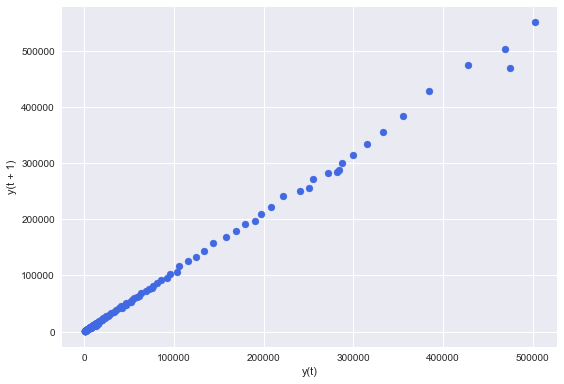

In [115]:
from pandas.plotting import lag_plot
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
data = co2tmp4C["co2"]
lag_plot(data)


plt.tight_layout()
plt.savefig("india_lag-plot_co2.png")
plt.show()

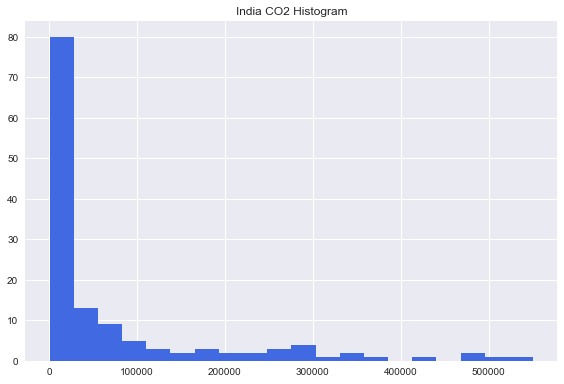

In [140]:
from matplotlib import pyplot as plt 
import numpy as np  
   
a = np.array(co2tmp4C["co2"]) 
plt.hist(a, bins='auto') 
plt.title("India CO2 Histogram")
plt.tight_layout()
plt.savefig("india_histogram_co2.png")
plt.show()

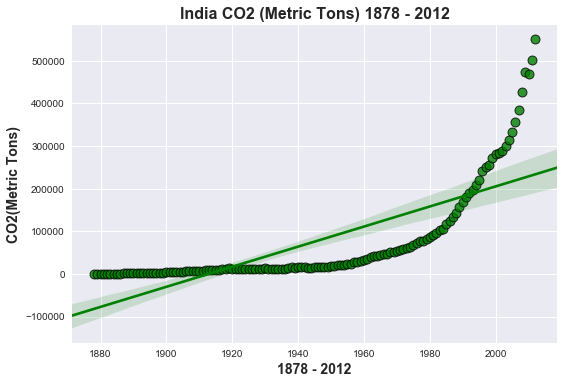

In [117]:
# https://seaborn.pydata.org/generated/seaborn.regplot.html
# import seaborn as sns; sns.set(color_codes=True)

import seaborn as sns

x_axis = co2tmp4C["year"]  
y_axis = co2tmp4C["co2"]



sns.regplot(x=x_axis, y=y_axis, color="green", marker="o", fit_reg=True, 
            scatter_kws={"s":80, "linewidths":1, "edgecolor":"k"})

sns.set_style("darkgrid")
sns.plt.title("India CO2 (Metric Tons) 1878 - 2012", weight='bold').set_fontsize('16')
sns.plt.xlabel("1878 - 2012", weight='bold').set_fontsize('14')
sns.plt.ylabel("CO2(Metric Tons)", weight='bold',).set_fontsize('14')

plt.tight_layout()
plt.savefig("india_co2_scatter.png",bbox_inches="tight")
plt.show()

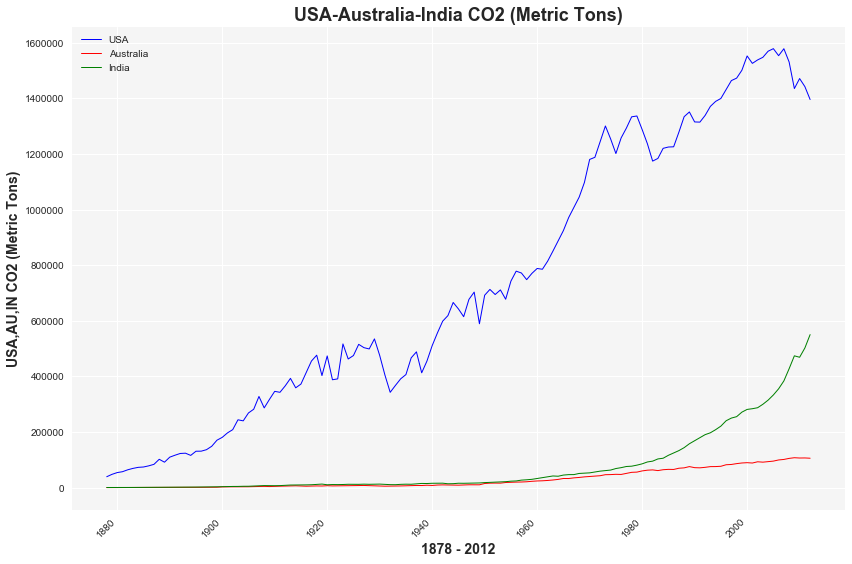

In [118]:
# Dependencies
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime, date, time
import matplotlib.dates as mdates

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

x_axis = co2tmp4A["year"]  
y1_axis = co2tmp4A["co2"]
y2_axis = co2tmp4B["co2"]
y3_axis = co2tmp4C["co2"]

ax.set_title("USA-Australia-India CO2 (Metric Tons)",\
             weight='bold').set_fontsize('18')
ax.set_xlabel("1878 - 2012", weight='bold').set_fontsize('14')
ax.set_ylabel("USA,AU,IN CO2 (Metric Tons)", 
              weight='bold').set_fontsize('14')

ax.grid(True)
ax.set_facecolor("whitesmoke")
fig.autofmt_xdate(rotation=45, ha='right')

ax.plot(x_axis, y1_axis, color="blue", linewidth= 1)
ax.plot(x_axis, y2_axis, color="red", linewidth= 1)
ax.plot(x_axis, y3_axis, color="green", linewidth= 1)

ax.legend(["USA","Australia","India"],loc='best')

plt.tight_layout()
plt.savefig("co2_metric_tons_usa-au-in.png")
plt.show()

In [119]:
co2tmp5 = co2_tmp_df.loc[(co2_tmp_df["country"] == 'UNITED KINGDOM') & 
                         (co2_tmp_df["year"]>= 1850)].\
                         reset_index(drop=True)
print(len(co2tmp5.index))
co2tmp5.head(5)

163


,year,country,co2,avg_yly_tmp_f,avg_yly_tmp_c,avg_yly_tmp_uncertainty
0,1850,UNITED KINGDOM,33462,46.80485,8.224917,1.439667
1,1851,UNITED KINGDOM,31838,47.00060,8.333667,1.505500
2,1852,UNITED KINGDOM,31725,48.15500,8.975000,1.398667
3,1853,UNITED KINGDOM,31550,46.04045,7.800250,1.188417
4,1854,UNITED KINGDOM,38019,47.32070,8.511500,1.379833


In [120]:
# Get the min and max date range
co2tmp5_min_date = co2tmp5["year"].min()
co2tmp5_max_date = co2tmp5["year"].max()
print("min year " + str(co2tmp5_min_date) + " max year " + \
      str(co2tmp5_max_date))

min year 1850 max year 2012


In [121]:
co2tmp5.corr()

,year,co2,avg_yly_tmp_f,avg_yly_tmp_c,avg_yly_tmp_uncertainty
year,1.000000,0.872129,0.557307,0.557307,-0.837614
co2,0.872129,1.000000,0.338821,0.338821,-0.906839
avg_yly_tmp_f,0.557307,0.338821,1.000000,1.000000,-0.372581
avg_yly_tmp_c,0.557307,0.338821,1.000000,1.000000,-0.372581
avg_yly_tmp_uncertainty,-0.837614,-0.906839,-0.372581,-0.372581,1.000000


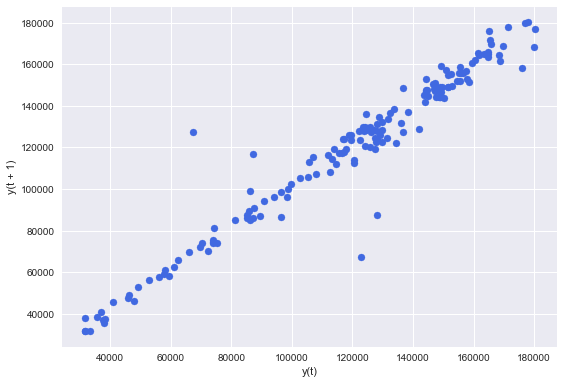

In [122]:
from pandas.plotting import lag_plot
from matplotlib.figure import Figure
import matplotlib.pyplot as plt

plt.figure()
data = co2tmp5["co2"]
lag_plot(data)

plt.tight_layout()
plt.savefig("uk_lag-plot_co2.png")
plt.show()

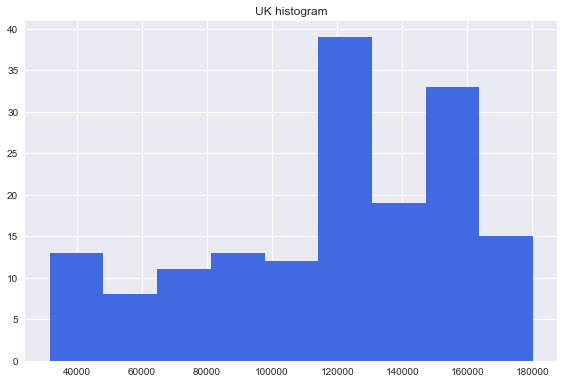

In [123]:
from matplotlib import pyplot as plt 
import numpy as np  
   
a = np.array(co2tmp5["co2"]) 
plt.hist(a, bins='auto') 
plt.title("UK histogram")
plt.tight_layout()
plt.savefig("uk_histogram_co2.png")
plt.show()

In [124]:
co2tmp6 = co2_tmp_df.loc[(co2_tmp_df["country"] == 'SPAIN') & 
                         (co2_tmp_df["year"]>= 1850)].\
                         reset_index(drop=True)
print(len(co2tmp6.index))
co2tmp6.head(5)

163


,year,country,co2,avg_yly_tmp_f,avg_yly_tmp_c,avg_yly_tmp_uncertainty
0,1850,SPAIN,135,56.35010,13.527833,1.469167
1,1851,SPAIN,139,55.85555,13.253083,1.639000
2,1852,SPAIN,146,57.12065,13.955917,1.422000
3,1853,SPAIN,178,54.85115,12.695083,1.219000
4,1854,SPAIN,150,55.90355,13.279750,1.444500


In [125]:
# Get the min and max date range
co2tmp6_min_date = co2tmp6["year"].min()
co2tmp6_max_date = co2tmp6["year"].max()
print("min year " + str(co2tmp6_min_date) + " max year " + \
      str(co2tmp6_max_date))

min year 1850 max year 2012


In [126]:
co2tmp6.corr()

,year,co2,avg_yly_tmp_f,avg_yly_tmp_c,avg_yly_tmp_uncertainty
year,1.000000,0.842306,0.578607,0.578607,-0.863532
co2,0.842306,1.000000,0.602164,0.602164,-0.542022
avg_yly_tmp_f,0.578607,0.602164,1.000000,1.000000,-0.384479
avg_yly_tmp_c,0.578607,0.602164,1.000000,1.000000,-0.384479
avg_yly_tmp_uncertainty,-0.863532,-0.542022,-0.384479,-0.384479,1.000000


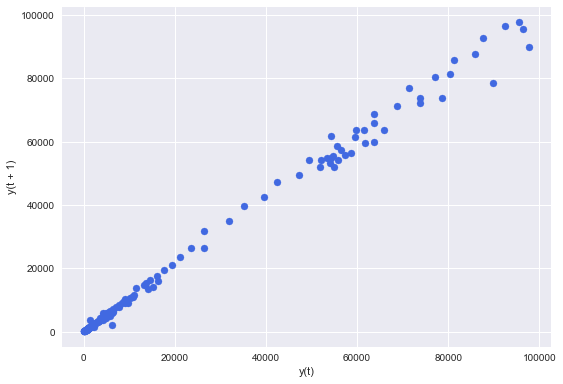

In [127]:
from pandas.plotting import lag_plot
from matplotlib.figure import Figure
import matplotlib.pyplot as plt

plt.figure()
data = co2tmp6["co2"]
lag_plot(data)

plt.tight_layout()
plt.savefig("spain_lag-plot_co2.png")
plt.show()

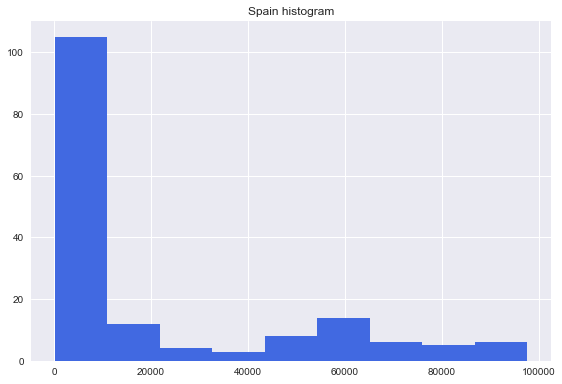

In [128]:
from matplotlib import pyplot as plt 
import numpy as np  
   
a = np.array(co2tmp6["co2"]) 
plt.hist(a, bins='auto') 
plt.title("Spain histogram")
plt.tight_layout()
plt.savefig("spain_histogram_co2.png")
plt.show()

In [129]:
co2tmp7 = co2_tmp_df.loc[(co2_tmp_df["country"] == 'POLAND') & 
                         (co2_tmp_df["year"]>= 1850)].\
                         reset_index(drop=True)
print(len(co2tmp7.index))
co2tmp7.head(5)

163


,year,country,co2,avg_yly_tmp_f,avg_yly_tmp_c,avg_yly_tmp_uncertainty
0,1850,POLAND,874,44.53340,6.963000,1.480167
1,1851,POLAND,944,45.41390,7.452167,1.469750
2,1852,POLAND,1127,45.97745,7.765250,1.418250
3,1853,POLAND,1178,43.84955,6.583083,1.035167
4,1854,POLAND,1304,44.97470,7.208167,1.308333


In [130]:
# Get the min and max date range
co2tmp7_min_date = co2tmp7["year"].min()
co2tmp7_max_date = co2tmp7["year"].max()
print("min year " + str(co2tmp7_min_date) + " max year " + \
      str(co2tmp7_max_date))

min year 1850 max year 2012


In [131]:
co2tmp7.corr()

,year,co2,avg_yly_tmp_f,avg_yly_tmp_c,avg_yly_tmp_uncertainty
year,1.000000,0.882404,0.472032,0.472032,-0.817449
co2,0.882404,1.000000,0.368001,0.368001,-0.634170
avg_yly_tmp_f,0.472032,0.368001,1.000000,1.000000,-0.330545
avg_yly_tmp_c,0.472032,0.368001,1.000000,1.000000,-0.330545
avg_yly_tmp_uncertainty,-0.817449,-0.634170,-0.330545,-0.330545,1.000000


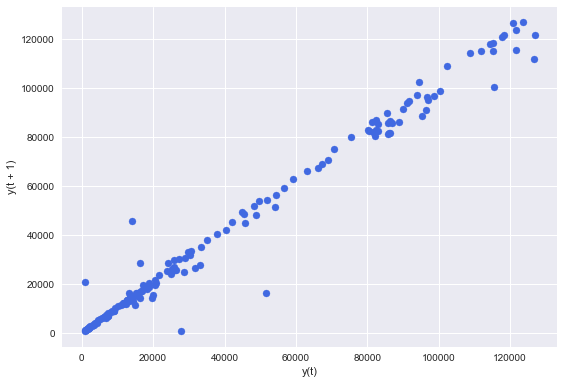

In [132]:
from pandas.plotting import lag_plot
from matplotlib.figure import Figure
import matplotlib.pyplot as plt

plt.figure()
data = co2tmp7["co2"]
lag_plot(data)

plt.tight_layout()
plt.savefig("poland_lag-plot_co2.png")
plt.show()

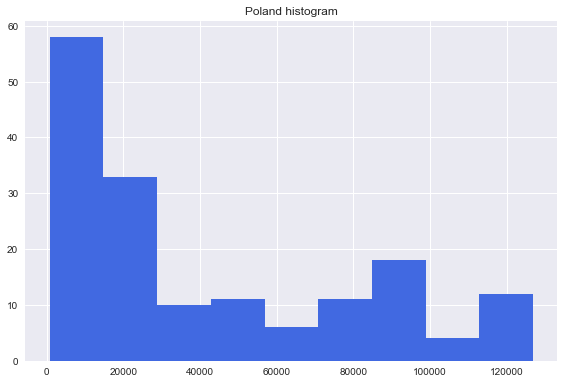

In [133]:
from matplotlib import pyplot as plt 
import numpy as np  
   
a = np.array(co2tmp7["co2"]) 
plt.hist(a, bins='auto') 
plt.title("Poland histogram")
plt.tight_layout()
plt.savefig("poland_histogram_co2.png")
plt.show()

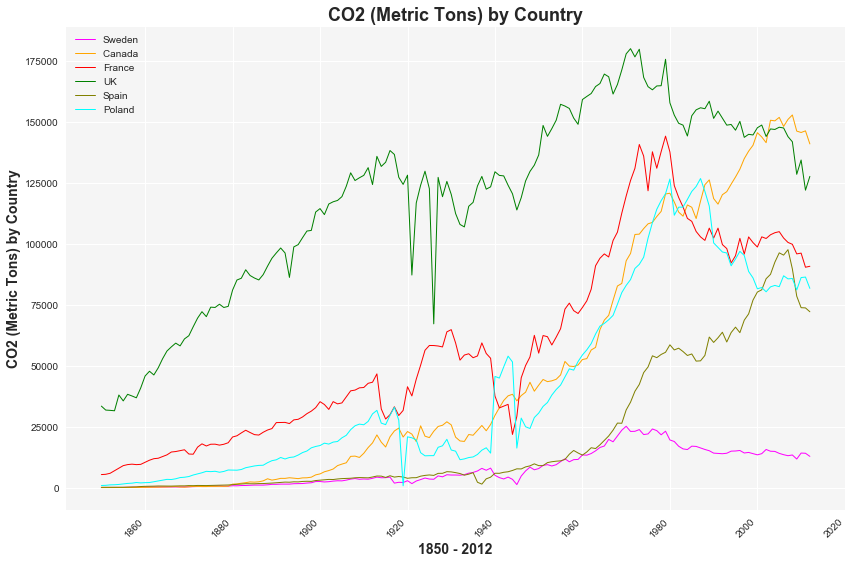

In [134]:
# Dependencies
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime, date, time
import matplotlib.dates as mdates

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

x_axis = co2tmp1["year"]  
y1_axis = co2tmp1["co2"]
y2_axis = co2tmp2["co2"]
y3_axis = co2tmp3["co2"]
y5_axis = co2tmp5["co2"]
y6_axis = co2tmp6["co2"]
y7_axis = co2tmp7["co2"]



ax.set_title("CO2 (Metric Tons) by Country",\
             weight='bold').set_fontsize('18')
ax.set_xlabel("1850 - 2012", weight='bold').set_fontsize('14')
ax.set_ylabel("CO2 (Metric Tons) by Country", 
              weight='bold').set_fontsize('14')

ax.grid(True)
ax.set_facecolor("whitesmoke")
fig.autofmt_xdate(rotation=45, ha='right')

ax.plot(x_axis, y1_axis, color="magenta", linewidth= 1)
ax.plot(x_axis, y2_axis, color="orange", linewidth= 1)
ax.plot(x_axis, y3_axis, color="red", linewidth= 1)
ax.plot(x_axis, y5_axis, color="green", linewidth= 1)
ax.plot(x_axis, y6_axis, color="olive", linewidth= 1)
ax.plot(x_axis, y7_axis, color="cyan", linewidth= 1)

ax.legend(["Sweden","Canada ","France","UK",
          "Spain","Poland"],loc='best')

plt.tight_layout()
plt.savefig("co2_metric_tons_by_country.png")
plt.show()